In [1]:
import sys

sys.path.append("./../../")

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from trailmet.datasets.tracking import TrackingDatasetFactory

In [3]:
root_dir = "./../../../got10kdata/"

In [4]:
got_dataset = TrackingDatasetFactory.create_dataset(
    name="got10k", root=root_dir, split_types=["train", "val", "test"]
)

In [29]:
got_dataset["train"]

In [5]:
print(got_dataset["info"])

{'train_size': 93350, 'val_size': 1800, 'test_size': 1800, 'note': ''}


In [7]:
# getting the size of the different splits of the data
print("Train samples: ", got_dataset["info"]["train_size"])
print("Val samples: ", got_dataset["info"]["val_size"])
print("Test samples: ", got_dataset["info"]["test_size"])

Train samples:  93350
Val samples:  1800
Test samples:  1800


In [9]:
# Construct dataloaders
train_loader = torch.utils.data.DataLoader(
    got_dataset["train"],
    batch_size=64,
    sampler=got_dataset["train_sampler"],
    num_workers=0,
)
val_loader = torch.utils.data.DataLoader(
    got_dataset["val"],
    batch_size=64,
    sampler=got_dataset["val_sampler"],
    num_workers=0,
)
test_loader = torch.utils.data.DataLoader(
    got_dataset["test"],
    batch_size=64,
    sampler=got_dataset["test_sampler"],
    num_workers=0,
)

print("No. of training batches: ", len(train_loader))
print("No. of validation batches: ", len(val_loader))
print("No. of test batches: ", len(test_loader))

No. of training batches:  1459
No. of validation batches:  29
No. of test batches:  29


In [16]:
next(iter(train_loader))[0].shape

torch.Size([64, 3, 127, 127])

Feature batch shape: torch.Size([64, 3, 127, 127])
Labels batch shape: torch.Size([64, 3, 239, 239])


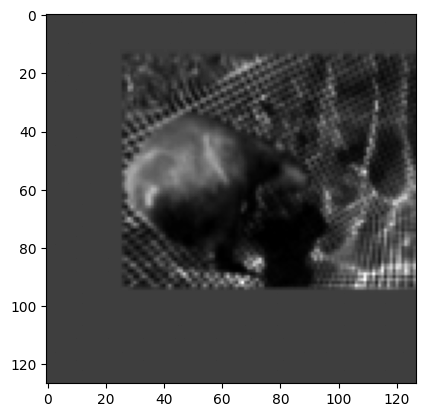

Label: tensor([[[87., 87., 87.,  ..., 87., 87., 87.],
         [87., 87., 87.,  ..., 87., 87., 87.],
         [87., 87., 87.,  ..., 87., 87., 87.],
         ...,
         [87., 87., 87.,  ..., 87., 87., 87.],
         [87., 87., 87.,  ..., 87., 87., 87.],
         [87., 87., 87.,  ..., 87., 87., 87.]],

        [[83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.],
         ...,
         [83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.]],

        [[83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.],
         ...,
         [83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.],
         [83., 83., 83.,  ..., 83., 83., 83.]]])


In [20]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[7, 0, :, :].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")